# Performance Comparison

Performance with basic LSTM Model


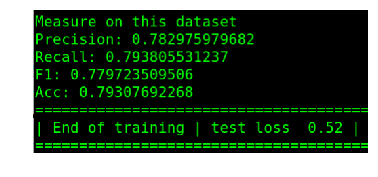

Performance with Self-Attentive Model


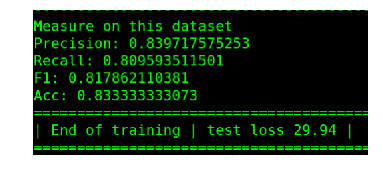

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


print 'Performance with basic LSTM Model'
image = mpimg.imread( 'Results/BasicLSTM.png' )

plt.axis('off')
plt.imshow( image )
plt.show()

print 'Performance with Self-Attentive Model'
image = mpimg.imread( 'Results/AttentionResults.png' )
plt.axis('off')
plt.imshow( image )
plt.show()

# Loading Attention Weights

In [2]:
import torch

cuda = True
path = 'data/yelp/'
test_batch_size = 32

# Load Attention weights
Weights = torch.load( 'attention_weights.pt' )

# Review Loading and Tokenization

In [3]:
import csv
from nltk.tokenize import word_tokenize

ReviewsAndTokens = []
count = 0
# Test dataset
with open( path + 'test.csv', 'r' ) as f:
    Reader = csv.reader( f, delimiter=',', quoting=csv.QUOTE_MINIMAL )
    for i, record in enumerate( Reader ):
        content = record[ 0 ]
        tokens = word_tokenize( content.decode('utf-8') )
        
        temp = [ content, tokens, record[1] ]
        ReviewsAndTokens.append( temp )
        count += 1
    
nbatch = count // test_batch_size
batchifiable = nbatch * test_batch_size

batchedReviewsAndTokens = ReviewsAndTokens[ :batchifiable ]

In [4]:
reviewAndweights = []
for i in range( 0, batchifiable - 1, test_batch_size ):

    for j in range( test_batch_size ):
        record = batchedReviewsAndTokens[ i+j ]
        record.extend( [ i, j ] )
        reviewAndweights.append( record )

# Attention Visualization on Reviews

In [12]:
def Highlight( string ):
    return "\x1b[31m" + string + "\x1b[0m"

reviewNum = 10
start = 2400
end = start + reviewNum
words2show = 10

for reviewID in range( start , end ):
    sample_review = batchedReviewsAndTokens[ reviewID ][ 0 ]
    sample_tokens = batchedReviewsAndTokens[ reviewID ][ 1 ]
    helpful = batchedReviewsAndTokens[ reviewID ][ 2 ]
    weights = Weights[ batchedReviewsAndTokens[ reviewID ][3] ][ 0 ][ batchedReviewsAndTokens[ reviewID ][ 4 ] ].data

    vector = weights.sum( 0 )
    vector = vector / vector.sum( 1 )[ 0,0 ]
    _, ids_to_show =  vector.sort( 1, descending=True )

    ids_to_show = ids_to_show.squeeze( 0 ).tolist()[:words2show]

    print 'Sample Review:'

    sent = ''
    for idx in range( len( sample_tokens ) ):
        if idx in ids_to_show:
            sent += ' ' + Highlight( sample_tokens[ idx ] )
        else:
            sent += ' ' + sample_tokens[ idx ]
    print sent
    
    print ''
    print 'Helpful?'
    print helpful
    print ''
        
    print '--' * 55

Sample Review:
 requested a room for my parents to visit my sister at ucf n they had the worst hotel experience ever , especially with front desk ! only bright side was housekeeping `` clean rooms . ''

Helpful?
0

--------------------------------------------------------------------------------------------------------------
Sample Review:
 excellent courtyard hotel ! ! brand new place , the staff is so friendly and nice.we would totally stay there again , they also have a residence inn part to the hotel that is dog friendly

Helpful?
1

--------------------------------------------------------------------------------------------------------------
Sample Review:
 we stayed a week at this hotel while visiting disney , rooms were beautiful , absolutely spotless and extremely comfortable . the front desk provided us excellent service . an absolutely stunning place to stay .

Helpful?
1

---------------------------------------------------------------------------------------------------------